# Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Objetivo:

Compreender as tendências, padrões e características das vendas farmacêuticas em diferentes regiões e demografias.

In [7]:
# Abrir o CSV dos Medicamentos Industrializados de de Novembro de 2021
df_industrial_medics = pd.read_csv('EDA_Industrializados_202111_sample.csv')

df_industrial_medics.shape

(200000, 16)

In [8]:
# Verificar a disposição dos dados
df_industrial_medics.head()
#df_industrial_medics.tail()

,Unnamed: 0,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,5310,2021,11,CE,FORTALEZA,OXCARBAZEPINA,300 MG COM REV CT BL AL AL X 30,3,CAIXA,CRM,CE,1.0,NaN,NaN,NaN,NaN
1,3356,2021,11,RJ,RIO DE JANEIRO,CLORIDRATO DE MOXIFLOXACINO,5 MG/ML SOL OFT CT FR PLAS TRANS GOT X 5 ML,1,CAIXA,CRM,RJ,5.0,NaN,2.0,50.0,1.0
2,137131,2021,11,RJ,RIO DE JANEIRO,SULFADIAZINA DE PRATA,10 MG / G CREM DERM CT BG AL REV X 50 G,2,CAIXA,CRM,RJ,5.0,NaN,2.0,75.0,1.0
3,202348,2021,11,PR,ROLÂNDIA,ALPRAZOLAM,2 MG COM CT BL AL PLAS INC X 30,4,FRASCO,CRM,PR,2.0,NaN,NaN,NaN,NaN
4,152609,2021,11,RJ,SÃO GONÇALO,AMOXICILINA + CLAVULANATO DE POTÁSSIO,(500+125) MG COM REV CT STR AL/AL X 18,2,CAIXA,CRM,RJ,5.0,NaN,1.0,23.0,1.0


In [9]:
#Verificar os meta dados do DataFrame
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe dos medicamentos industrializados de novembro de 2021
metadata_df = generate_metadata(df_industrial_medics)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Unnamed: 0,int64,0,0.00,200000
1,ANO_VENDA,int64,0,0.00,1
2,MES_VENDA,int64,0,0.00,1
3,QTD_VENDIDA,int64,0,0.00,434
4,TIPO_RECEITUARIO,float64,0,0.00,5
5,SEXO,float64,68884,34.44,2
6,IDADE,float64,68884,34.44,180
7,UNIDADE_IDADE,float64,68884,34.44,2
8,UF_VENDA,object,0,0.00,15
9,MUNICIPIO_VENDA,object,0,0.00,352


# Atividades a serem desenvolvidas

## 1. Limpeza e Pré-processamento de Dados:

* Lidar com valores ausentes: Decidir se vai imputar, preencher ou remover linhas/colunas com dados faltantes.

* Tratar outliers: Identificar e lidar com outliers que podem distorcer a análise.

* Converter tipos de dados, se necessário, garantindo que colunas relacionadas a datas estejam no formato correto.

In [10]:
#Verificando quais são os valores únicos da coluna CID10
unique_CID = df_industrial_medics['CID10'].dropna().unique()
list(unique_CID)

['A499',
 'A04',
 'A49',
 'K08',
 'R07',
 'N39',
 'E291',
 'B349',
 'N96',
 'J852',
 'N07',
 'L08',
 'N300',
 'J03',
 'A00',
 'H60']

In [11]:
# Para tratar dor nulos, primeiro podemos desconsiderar a coluna que possui 99,9% de nulos, já que não será útil para a análise
df_industrial_medics = df_industrial_medics.drop(columns=['CID10'])

In [12]:
#Verificando quais são os valores únicos da coluna Principio Ativo
#unique_active = df['PRINCIPIO_ATIVO'].dropna().unique()
#list(unique_active)

In [13]:
#Considerando que temos 0,19% de nulos na coluna PRINCIPIO_ATIVO, podemos desconsiderar essas linhas para a análise
df_industrial_medics = df_industrial_medics.dropna(subset=['PRINCIPIO_ATIVO'])
df_industrial_medics.shape

(199619, 15)

In [14]:
#Coincidentemente as colunas 'SEXO', 'IDADE' e 'UNIDADE_IDADE' possuem os mesmos valores nulos, sugerindo que essas pessoas compraram medicamentos sem informar esses dados, 
# ou de uma forma que não foi possível capturar essas informações.

#'SEXO' faz sentido ter cardinalidade 2, mas 'UNIDADE_IDADE' nao sabemos o que e para ter essa caridinalidade
#Vamos verificar os valores únicos da coluna 'UNIDADE_IDADE'
unique_age_unit = df_industrial_medics['UNIDADE_IDADE'].dropna().unique()
list(unique_age_unit)

[1.0, 2.0]

In [15]:
#Para essas ultimas columas vou precisar utilizar uma estatistica descritiva
df_industrial_medics.describe(include='all')

#Por enquanto não vamos tratar os nulos das colunas 'SEXO', 'IDADE' e 'UNIDADE_IDADE', pois não sabemos o motivo deles estarem nulos e não queremos perder dados importantes para a análise

,Unnamed: 0,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
count,199619.000000,199619.0,199619.0,199619,199619,199619,199619,199619.000000,199619,199619,199619,199619.000000,130771.000000,130771.000000,130771.000000
unique,NaN,NaN,NaN,15,352,353,2183,NaN,2,4,27,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,RJ,RIO DE JANEIRO,AZITROMICINA DI-HIDRATADA,500 MG CAP DURA CT BL AL PLAS TRANS X 21,NaN,CAIXA,CRM,RJ,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,70848,15425,12615,5890,NaN,171992,182565,68846,NaN,NaN,NaN,NaN
mean,102369.028053,2021.0,11.0,NaN,NaN,NaN,NaN,4.052745,NaN,NaN,NaN,3.384593,1.548937,40.181822,1.017963
std,59094.883047,0.0,0.0,NaN,NaN,NaN,NaN,28.912108,NaN,NaN,NaN,1.851434,0.497601,39.346989,0.132816
min,0.000000,2021.0,11.0,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000
25%,51235.500000,2021.0,11.0,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,25.000000,1.000000
50%,102327.000000,2021.0,11.0,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,5.000000,2.000000,39.000000,1.000000
75%,153568.500000,2021.0,11.0,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,5.000000,2.000000,55.000000,1.000000


In [16]:
#Transformar os dados de 'SEXO' em masculino e feminino
df_industrial_medics['SEXO'] = df_industrial_medics['SEXO'].replace({1: 'Masculino', 2: 'Feminino'})

#Verificar a distribuição dos dados da coluna 'SEXO' para ver se a transformação foi feita corretamente
df_industrial_medics['SEXO'].value_counts()
# Calculate the proportion in percentage of each value in the 'SEXO' column
sexo_proportion = df_industrial_medics['SEXO'].value_counts(normalize=True) * 100
sexo_proportion
#Agora podemos substituir os valores nulos de 'SEXO'

SEXO
Feminino     54.893669
Masculino    45.106331
Name: proportion, dtype: float64

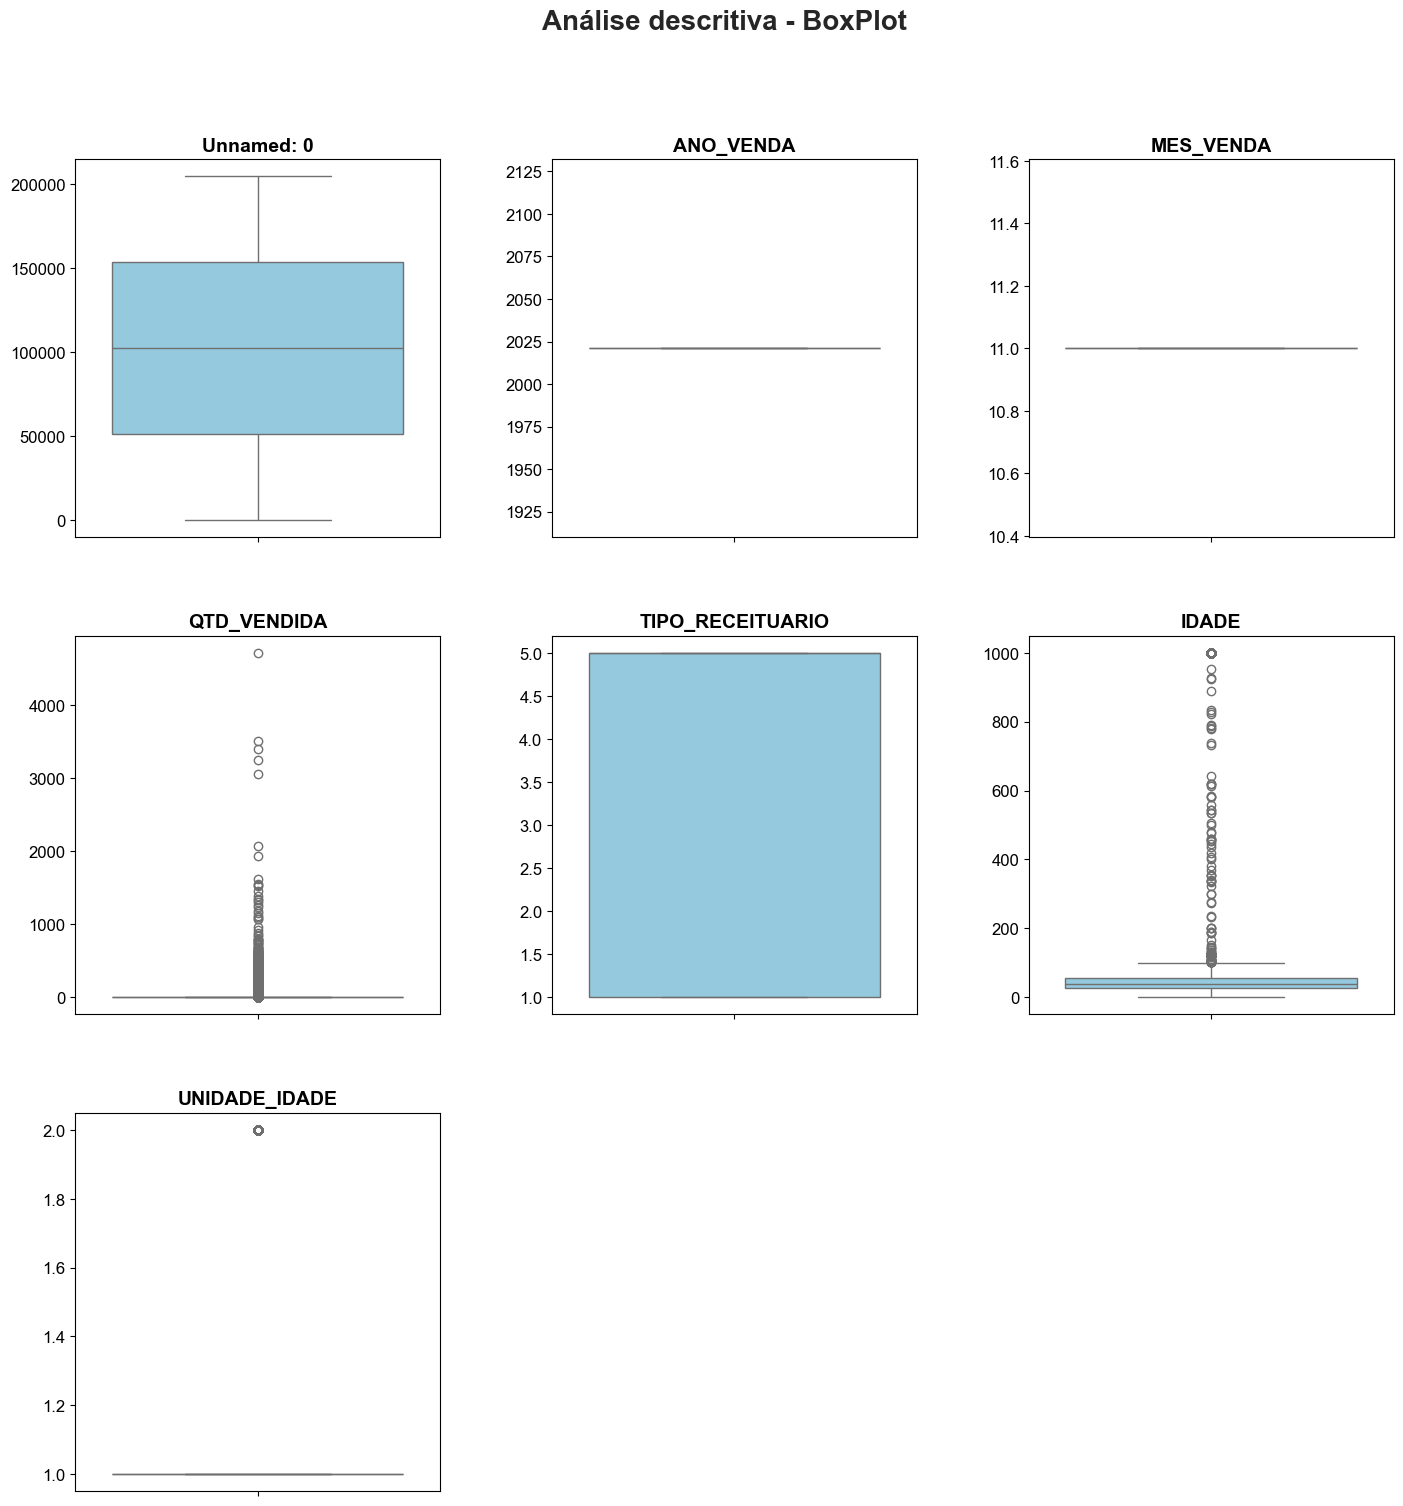

In [17]:
# Por ultimo vamos tratar os outliers

def box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
box_plot(df_industrial_medics)

In [18]:
#Alguns dados nao estao fazendo sentido, por exemplo idades acima de 200 anos, esse é um erro de tipo de dado

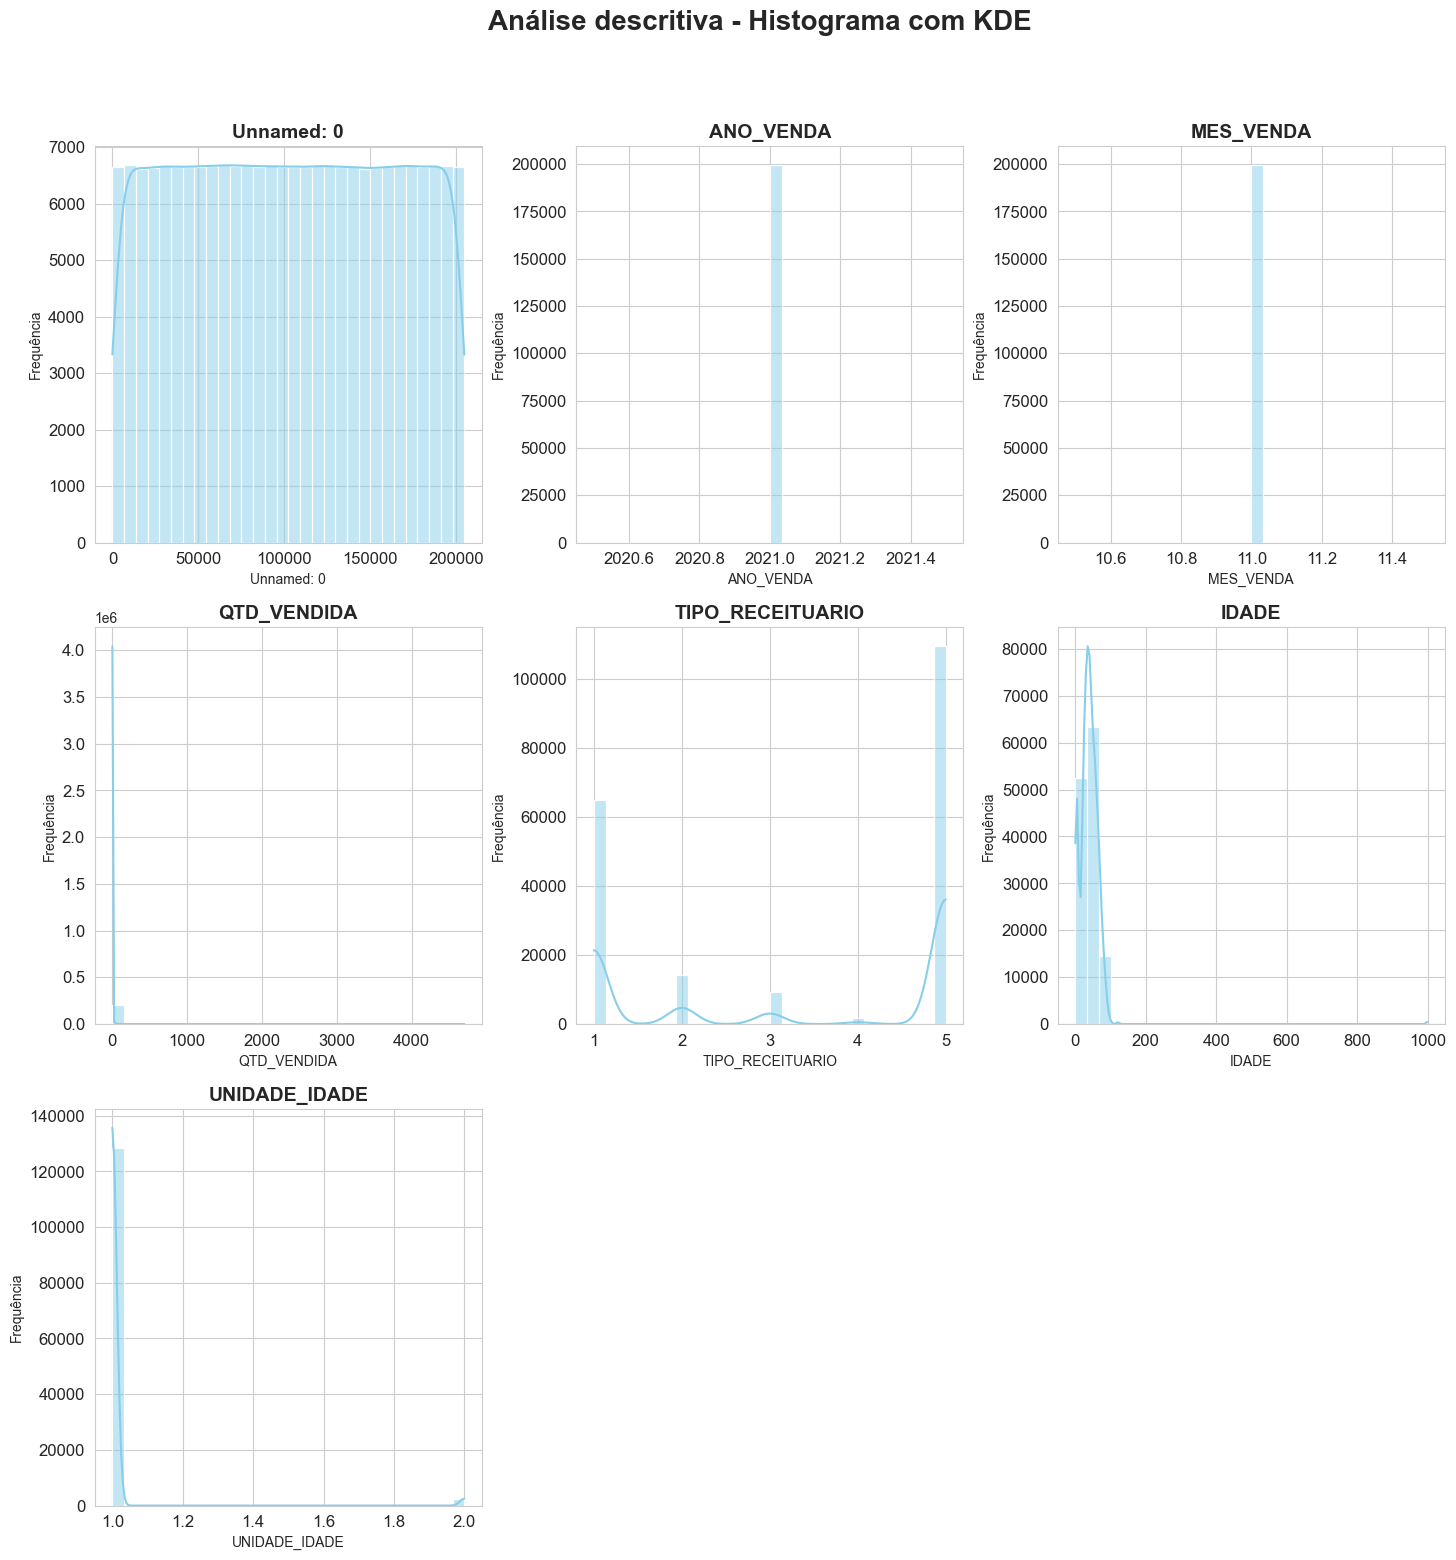

In [19]:
def histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
histograms(df_industrial_medics)

## 2. Análise Exploratória de Dados (EDA):

* Tendências de Vendas:
    - Vendas mensais: Identificar se há meses com vendas excepcionalmente altas ou baixas.
    - Análise por estado (UF_VENDA): Quais estados têm o maior número de vendas? Existem padrões regionais?
* Produtos Mais Vendidos:
    - Baseado no PRINCIPIO_ATIVO: Quais são os medicamentos mais populares?
    - Baseado na DESCRICAO_APRESENTACAO: Quais apresentações ou dosagens são mais vendidas?
* Demografia dos Consumidores:
    - Distribuição de idade dos compradores.
    - Distribuição de gênero dos compradores.
* Correlações:
    - Existe uma correlação entre o tipo de medicamento e a idade do comprador?
    - Existe uma correlação entre o gênero do comprador e o tipo de medicamento?


C:\Users\kawda\AppData\Local\Temp\ipykernel_23116\1871323272.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=uf_counts.index, y=uf_counts.values, palette='viridis')


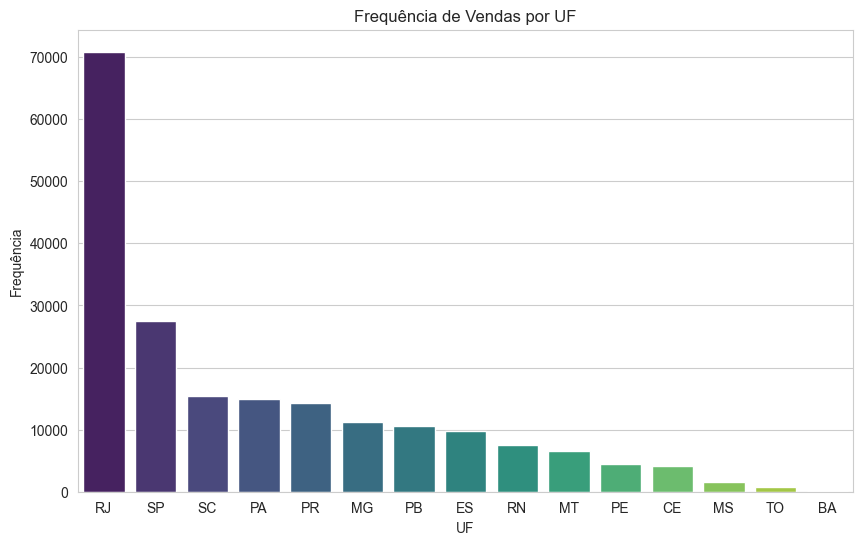

In [20]:
#Não podemos determinar se há meses com mais ou menos vendas pois a base de dados é relacionada a apenas um mês, porem podemos analisar as vendas por estado e se existem padroes regionais
#De acordo com nossa tabela de estatistica descritiva temos o RJ como maior comprador desses remédios, mas podemos fazer um histograma por estado para confirmar
# Contar a frequência de cada UF
uf_counts = df_industrial_medics['UF_VENDA'].value_counts()

# Plotar o histograma usando matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=uf_counts.index, y=uf_counts.values, palette='viridis')
plt.xlabel('UF')
plt.ylabel('Frequência')
plt.title('Frequência de Vendas por UF')
plt.show()

#Com isso podemos ver tambem que a região com mais vendas é a região sudeste, mas podemos fazer um histograma por região para confirmar


## 3. Visualização de Dados:

* Gráficos de barras para mostrar as vendas por estado, por medicamento e por gênero.
* Histogramas para distribuição de idade.
* Heatmaps para correlações.
* Gráficos de linha para tendências de vendas ao longo dos meses.

## 4. Insights e Recomendações:

* Com base na EDA, identifique insights interessantes sobre os hábitos de compra e padrões.
* Formule recomendações para farmácias ou empresas farmacêuticas com base nas tendências observadas.

# Montar uma apresentação com até 5 slides sobre minha análise

### Slide 1: Título e Introdução

* Título: "Análise de Vendas Farmacêuticas"
* Subtítulo: Uma visão geral das vendas de medicamentos.

### Slide 2: Metodologia e Limpeza de Dados


* Título: "Metodologia e Preparação de Dados"
* Pontos Principais:
    - Breve descrição dos dados: O que cada coluna representa.
    - Como os valores ausentes foram tratados.
    - Como os outliers foram identificados e tratados.
* Gráfico/Imagem: Uma visualização que mostre, por exemplo, a quantidade de dados ausentes por coluna ou um gráfico de caixa mostrando a distribuição de uma variável-chave.

### Slide 3: Tendências e Padrões de Vendas



* Título: "Tendências de Vendas por Região e Tempo"
* Pontos Principais:
    - Vendas totais por estado.
    - Meses com maiores e menores vendas.
* Gráficos:
    - Gráfico de barras mostrando vendas por estado.
    - Gráfico de linha mostrando a tendência de vendas ao longo dos meses.

### Slide 4: Informações Demográficas


* Título: "Perfil do Consumidor"
* Pontos Principais:
    - Distribuição de idade dos compradores.
    - Distribuição de gênero dos compradores.
* Gráficos:
    - Histograma para distribuição de idade.
    - Gráfico de barras ou torta para distribuição de gênero.

### Slide 5: Conclusões e Recomendações


* Título: "Insights e Próximos Passos"
* Pontos Principais:
    - Quais medicamentos ou apresentações são os mais vendidos e onde.
    - Insights sobre preferências demográficas.
    - Recomendações para estratégias de marketing ou distribuição.
* Imagem: Uma imagem que represente estratégia ou planejamento.